In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
obs_file='/shared/obs/gridded/OISSTv2/monthly/sst.mnmean.nc'
ds_obs=xr.open_dataset(obs_file)
ds_obs

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 461)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [4]:
mask_file='/shared/obs/gridded/OISSTv2/lmask/lsmask.nc'
ds_mask=xr.open_dataset(mask_file)
ds_mask

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-10-29
Data variables:
    mask     (time, lat, lon) float32 ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [5]:
ds_mask=ds_mask.reindex(lat=list(reversed(ds_mask['lat'])))
ds_obs=ds_obs.reindex(lat=list(reversed(ds_obs['lat'])))

In [6]:
model_path='/shared/cmip5/data/historical/atmos/mon/Amon/ts/NCAR.CCSM4/r1i1p1/'
model_file='ts_Amon_CCSM4_historical_r1i1p1_185001-200512.nc'
ds_model=xr.open_dataset(model_path+model_file)
ds_model

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                historical
    source:                       CCSM4
    model_id:                     CCSM4
    forcing:                      Sl GHG Vl SS Ds SD BC MD OC Oz AA LU
    parent_experiment_id:         piControl
    parent_experiment_rip:        r1i1p1
    branch_time:                  937.0
    contact:     

In [7]:
ds_model['ts']

<xarray.DataArray 'ts' (time: 1872, lat: 192, lon: 288)>
[103514112 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    standard_name:     surface_temperature
    long_name:         Surface Temperature
    comment:           TS no change, CMIP5_table_comment: ""skin"" temperatur...
    units:             K
    original_name:     TS
    cell_methods:      time: mean (interval: 30 days)
    cell_measures:     area: areacella
    history:           2011-10-21T17:19:45Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [9]:
ds_obs['sst']

<xarray.DataArray 'sst' (time: 461, lat: 180, lon: 360)>
[29872800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Attributes:
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]

In [10]:
ds_model['ts'].attrs['units']

'K'

In [11]:
ds_obs['sst'].attrs['units']

'degC'

In [12]:
ds_model['ts']=ds_model['ts']-273.15
ds_model['ts'].attrs['units']='degC'

In [13]:
ds_model['ts']

<xarray.DataArray 'ts' (time: 1872, lat: 192, lon: 288)>
array([[[-31.266891, -33.268387, -33.1382  , ..., -33.380997,
         -31.5755  , -32.951096],
        [-30.15039 , -30.425888, -30.773392, ..., -30.210098,
         -30.5587  , -31.326797],
        [-28.717392, -29.334   , -29.602997, ..., -27.7818  ,
         -28.876297, -28.813889],
        ...,
        [-39.56479 , -39.55899 , -39.558   , ..., -39.594696,
         -39.586395, -39.578094],
        [-39.443893, -39.4404  , -39.436996, ..., -39.453796,
         -39.450287, -39.447098],
        [-39.26799 , -39.26819 , -39.268387, ..., -39.26709 ,
         -39.267395, -39.2677  ]],

       [[-39.0009  , -41.008392, -40.92389 , ..., -41.04619 ,
         -39.383698, -40.83719 ],
        [-38.173996, -38.543396, -38.886093, ..., -38.47429 ,
         -38.353897, -39.501694],
        [-37.241592, -37.768692, -37.8994  , ..., -36.854095,
         -37.65419 , -37.519897],
        ...,
        [-37.5412  , -37.521088, -37.49939 , ..., -

In [14]:
ds_model_mean=ds_model.mean(dim='time')
ds_obs_mean=ds_obs.mean(dim='time')
ds_model_mean

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds  (lon, bnds) float64 -0.625 0.625 0.625 1.875 ... 358.1 358.1 359.4
    ts        (lat, lon) float32 -48.987423 -49.012203 ... -21.503736 -21.50329

In [15]:
ds_model_mean=ds_model_mean.rename({'ts':'sst'})
ds_model_mean

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds  (lon, bnds) float64 -0.625 0.625 0.625 1.875 ... 358.1 358.1 359.4
    sst       (lat, lon) float32 -48.987423 -49.012203 ... -21.503736 -21.50329

In [16]:
model_interp=ds_model_mean.interp_like(ds_obs_mean)
model_interp

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -89.75 -89.03 -88.97 ... 88.97 89.03 89.75
    lon_bnds  (lon, bnds) float64 -0.125 1.125 0.875 2.125 ... 359.1 nan nan
    sst       (lat, lon) float64 -48.43 -48.46 -48.45 ... -21.45 -21.45 nan

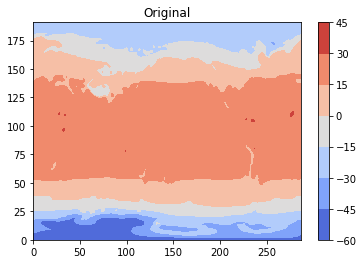

In [17]:
plt.contourf(ds_model_mean['sst'],cmap='coolwarm')
plt.title('Original')
plt.colorbar()

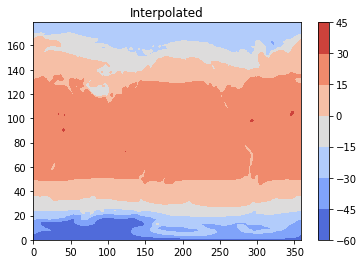

In [18]:
plt.contourf(model_interp['sst'],cmap='coolwarm')
plt.title('Interpolated')
plt.colorbar()

In [19]:
diff=(model_interp-ds_obs_mean).where(ds_mask['mask'].squeeze()==1)
diff

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 1981-10-29
Data variables:
    sst      (lat, lon) float64 nan nan nan nan nan ... -19.66 -19.66 -19.66 nan

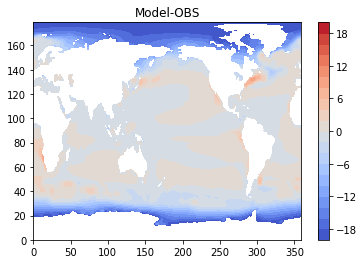

In [21]:
clevs=np.arange(-20,21,2)
plt.contourf(diff['sst'],clevs,cmap='coolwarm')
plt.title('Model-OBS')
plt.colorbar()